In [2]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/도와줘.csv')
df1.head()

,No.,국가코드,발명의 명칭,"0(버림),1(씀)",요약,text_en,독립항,출원인,출원인(원문),발명자,...,메인 CPC,전체 CPC,인용문헌수,특허인용 수,국가별 특허인용 수,피인용문헌 수,특허피인용 국가,특허/실용구분,요약(원문),Is_Top_30
0,3,KR,인공지능 알고리즘을 이용한 맞춤형 인솔 주문 시스템(sysytem for order...,1,"본 발명에 따른 인공지능 알고리즘을 이용한 맞춤형 인솔 주문 시스템은,\n고객의 개...",The customized insole ordering system using an...,"[청구항1]\n고객의 개인 정보 및 족부 이미지 정보가 입력되고, 전송되는 고객 단...",우주텍,-,허민수,...,G06Q-0030/0621,"G06Q-0030/0621,A43B-0007/28, A43D-0001/02, G06...",1,1,KR(1),0,-,특허공개,-,True
1,4,KR,인공지능 알고리즘을 이용한 맞춤형 인솔의 주문 방법(method for orderi...,1,"본 발명에 따른 인공지능 알고리즘을 이용한 맞춤형 인솔의 주문 방법은,\na) 인공...",The method of ordering customized insoles usin...,"[청구항1]\n고객의 개인 정보 및 족부 이미지 정보가 입력되고, 전송되는 고객 단...",우주텍,-,허민수,...,G06Q-0030/0621,"G06Q-0030/0621,A43B-0007/28, A43D-0001/02, G06...",1,1,KR(1),0,-,특허공개,-,True
2,6,CN,Geological hazard risk assessment method and s...,1,the geological hazard risk assessment method a...,the geological hazard risk assessment method a...,[청구항1]\n1. A geological hazard risk assessment...,SICHUAN HUADI CONSTRUCTION ENG,四川省华地建设工程有限责任公司,宋长宝 | 安艳东 | 张灿 | 雷壮 | 杨涛 | 伍剑波 | 李振男,...,-,-,0,0,-,0,-,특허공개,本申请提供的基于人工智能的地质灾害风险评估方法及系统，对第一范例种类结果以及新增事项种类目录...,True
3,9,KR,"시설 진단, 3d 스캐닝, 영상 촬영을 하는 드론, 수단, 장비, 시스템(drone...",1,"본 발명은 진단, 계측, 측정, 측량, 관측, 촬영, 스캐닝, 3D스캐닝, 모니터링...","The present invention relates to means, techni...","[청구항1]\n시설을 진단하는 시스템으로서,\n상기 시스템에 드론이 포함되고, \n...",한국산업기술원,-,정하익,...,G06Q-0050/10,"G06Q-0050/10,B64U-0020/87, G06N-0003/08, G06Q-...",0,0,-,0,-,특허공개,-,True
4,14,CN,"Model training methods, devices, electronic de...",1,The application provides an artificial intelli...,The application provides an artificial intelli...,[청구항1]\n1. An artificial intelligence-based mo...,TENCENT TECH SHENZHEN,腾讯科技(深圳)有限公司,杨善明,...,-,-,0,0,-,0,-,특허공개,本申请提供了一种基于人工智能的模型训练方法、装置、电子设备、计算机可读存储介质及计算机程序产...,True


In [3]:
df = pd.DataFrame({'filenames':df1['No.'], 'text_en':df1['text_en']})

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
import string

remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)
lemma = WordNetLemmatizer()
nltk.download('wordnet')

def letoken(tokens):
  return[lemma.lemmatize(token) for token in tokens]
def lenormalize(text):
  return letoken(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

tfidf_vect = TfidfVectorizer(tokenizer = lenormalize,
                             stop_words='english', ngram_range=(1,2),
                             min_df=0.05, max_df = 0.85)
ftr_vect = tfidf_vect.fit_transform(df['text_en'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [5]:
print(ftr_vect)

  (0, 91)	0.06904942212478442
  (0, 77)	0.06372399827572686
  (0, 127)	0.050934126744820916
  (0, 14)	0.046299733315108636
  (0, 184)	0.06672486289020635
  (0, 39)	0.06784921516469562
  (0, 26)	0.06466915799450734
  (0, 181)	0.04741739049948396
  (0, 102)	0.03272857721570169
  (0, 90)	0.03859865415799135
  (0, 89)	0.11026202231496683
  (0, 33)	0.057066096566429234
  (0, 65)	0.12231377067427321
  (0, 9)	0.2654613157692685
  (0, 179)	0.283770471030679
  (0, 37)	0.20592087955176197
  (0, 130)	0.050934126744820916
  (0, 134)	0.04611608290048904
  (0, 8)	0.13133468875857543
  (0, 165)	0.06012492524670752
  (0, 115)	0.14152080423422306
  (0, 73)	0.07350711823658483
  (0, 158)	0.19909598682695137
  (0, 178)	0.5281033195885192
  (0, 40)	0.052992883921657345
  :	:
  (763, 65)	0.3361202990017159
  (763, 73)	0.20199879722645292
  (763, 105)	0.6855659030540662
  (763, 80)	0.12723244586267426
  (763, 13)	0.12268236027804798
  (764, 4)	0.09693783521121518
  (764, 120)	0.07649976798398049
  (764, 100

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
from sklearn.cluster import KMeans

In [ ]:
def elbow(x):
  see=[]
  for i in range(2,11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(x)
    see.append(km.inertia_)

  plt.plot(range(2,11),see,marker='o')
  plt.show()

elbow(x)

NameError: name 'x' is not defined

In [ ]:
kmeans = KMeans(n_clusters=11, max_iter=100000, random_state=1234)

cluster_label= kmeans.fit_predict(ftr_vect)

df['cluster_label'] = cluster_label
print(df.sort_values(by=['cluster_label']))
a = df.sort_values(by=['cluster_label'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      filenames                                            text_en  \
2289       2723  Methods, systems, apparatuses, and computer pr...   
2749       3244  The invention relates to an AI weighing system...   
400         516  Disclosed is a conversational chatbot-based AI...   
398         514  Embodiments described herein are generally dir...   
1017       1284  The invention aims to provide an AI processor ...   
...         ...                                                ...   
246         327  The present invention provides a diabetic peri...   
3051       3594  The artificial intelligence-based false positi...   
245         325  The present invention discloses a knife-armed ...   
3802       4447  The invention provides an image coloring and m...   
3412       4010  The invention relates to an artificial intelli...   

      cluster_label  cluster1st  
2289              0        2180  
2749              0        2638  
400               0         393  
398               0    

In [ ]:
import numpy as np
import pandas as pd

def get_cluster_details(cluster_model, cluster_data, feature_names, num_clusters, top_n_features=11):
    cluster_details = {}
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:, ::-1]
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['center'] = cluster_num

        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_features_values'] = top_ftr_val
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filenames']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

def print_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(pd.DataFrame({'군집번호': [cluster_num] * len(cluster_detail['filenames']), '번호': cluster_detail['filenames']}))
        print()

# tfidf_vect, kmeans, df가 미리 정의되어 있다고 가정
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=kmeans, cluster_data=df, feature_names=feature_names, num_clusters=11, top_n_features=11)

print_details(cluster_details)

# CSV 파일로 저장
output_df = pd.DataFrame(columns=['군집번호', '번호'])
for cluster_num, cluster_detail in cluster_details.items():
    temp_df = pd.DataFrame({'군집번호': [cluster_num] * len(cluster_detail['filenames']), '번호': cluster_detail['filenames']})
    output_df = pd.concat([output_df, temp_df], ignore_index=True)

output_df.to_csv('/content/drive/MyDrive/agsdfsdfsd.csv', index=False)

     군집번호    번호
0       0    55
1       0   110
2       0   163
3       0   211
4       0   237
..    ...   ...
398     0  8085
399     0  8086
400     0  8089
401     0  8091
402     0  8092

[403 rows x 2 columns]

     군집번호    번호
0       1     3
1       1    13
2       1    45
3       1    51
4       1    65
..    ...   ...
455     1  8009
456     1  8081
457     1  8106
458     1  8116
459     1  8144

[460 rows x 2 columns]

     군집번호    번호
0       2    12
1       2    22
2       2    24
3       2    26
4       2    32
..    ...   ...
309     2  7874
310     2  7943
311     2  8001
312     2  8088
313     2  8090

[314 rows x 2 columns]

      군집번호    번호
0        3     1
1        3     2
2        3     4
3        3     5
4        3     6
...    ...   ...
1632     3  8119
1633     3  8125
1634     3  8145
1635     3  8165
1636     3  8173

[1637 rows x 2 columns]

     군집번호    번호
0       4    19
1       4    40
2       4    54
3       4    68
4       4    72
..    ...   ...
815    

In [8]:
import numpy as np

ftr_vect = tfidf_vect.fit_transform(df['text_en']).toarray()
vector = np.array(ftr_vect)

In [9]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1,min_samples=1, metric = "cosine")
#     거리 계산 식으로는 Cosine distance를 이용
#     eps이 낮을수록, min_samples 값이 높을수록 군집으로 판단하는 기준이 까다로움.
result = model.fit_predict(vector)
df['cluster1st'] = result

print('군집개수 :', result.max())
df['cluster1st'].value_counts().nunique()

군집개수 : 693


5

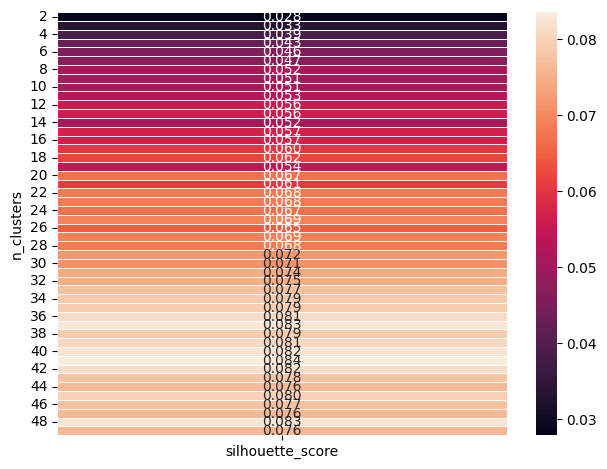

In [10]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def visualize_silhouette_layer(df, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,50)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")


    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(vector)